# Proyek Analisis Data: bikesharing
- **Nama:** Bima Indra Sakti
- **Email:** bima.indr2506@gmail.com
- **ID Dicoding:** bimaindr

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berubah berdasarkan jam dalam sehari dan hari dalam seminggu?
- Seberapa signifikan pengaruh kondisi cuaca dan musim terhadap jumlah total penyewaan sepeda
- Bagaimana perbedaan perilaku penyewaan antara pengguna terdaftar (Registered) dan pengguna biasa (Casual)

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bimaindr","key":"a2ed3487ebaf066cf0ae707d42056195"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 650MB/s]


In [5]:
with zipfile.ZipFile('bike-sharing-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('bike-sharing-data')

In [6]:
df_day = pd.read_csv('/content/bike-sharing-data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df_hour = pd.read_csv('/content/bike-sharing-data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Di dataset terdapat dteday (date day), season (musim), year, month, hour, hoilday, weekday, workingday, weathersit, temp (temperatur), atemp, hum, windspeed, casual dan registered namun di dataset sudah melakukan tahap scalling atau mengubah ke numerik.
- workingday yaitu untuk hari kerja biasanya di weekday holiday biasanya untuk weekend.
- Weatherist untuk keadaan cuaca tersebut.
- Apparent Temperature yaitu suhu yang dapat dirasakan manusia atau suhu badan.
- Humidity yaitu kelembapan pada udara tersebut.
- Registered yaitu untuk pengguna yang terdaftar sedangkan casual yaitu yang tidak terdaftar.

### Assessing Data

## Informasi df_day

In [8]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight: df_day**
- count menunjukan banyaknya hari yang terekam dan tidak ada nilai kosong.
- Rata-rata total penyewaan per hari yaitu sebanyak 4.504 sepeda.
- temp merupakan untuk suhu dan hum yaitu kelembapan dengan rata-rata 62%.
- Masih terdapat tipe data yang salah terutama dengan kurun waktu kalender, masih menggunakan object atau angka sehingga membuat audiens kurang mengerti nantinya.

## Informasi df_hour

In [12]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [14]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())
df_hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight: df_hour**
- df_hour tidak memiliki nilai kosong.
- Untuk penempatan waktu, tipe data masih menggunakan int bukan date time.
- Jika membandingkan rata-rata pengguna casual (35) dengan registered (153), terlihat jelas bahwa sekitar 80% total penyewa adalah pengguna terdaftar.
- Rata-rata penyewaan per jam adalah sekitar 189 sepeda (cnt). Namun, angka ini memiliki variasi yang sangat tinggi (standard deviation sebesar 181), yang berarti ada jam-jam di mana sepeda sangat sedikit disewa (minimal 1 sepeda) dan ada jam di mana permintaan melonjak drastis hingga 977 sepeda dalam satu jam.
- nilai max pada pengguna casual yang mencapai 367, padahal rata-ratanya hanya 35. Ini menunjukkan ada momen-momen tertentu (mungkin hari libur besar atau acara khusus) di mana orang yang bukan pelanggan tetap tiba-tiba menyewa dalam jumlah banyak.

### Cleaning Data

#### Cleaning Data df_day

In [15]:
# Mengubah tipe data menjadi datetime

df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [16]:
# Mengubah angka musim menjadi label

df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [17]:
# Mengubah angka tahun (0: 2011, 1: 2012)

df_day['yr'] = df_day['yr'].map({
    0: '2011', 1: '2012'
})

In [18]:
# Mengubah angka cuaca menjadi label
df_day['weathersit'] = df_day['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [19]:
df_day['mnth']= df_day['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

In [20]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,6,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,0,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [22]:
df_day.describe()

,instant,dteday,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [23]:
df_day[df_day.temp == df_day.temp.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
553,554,2012-07-07,Fall,2012,July,0,6,0,Clear/Partly Cloudy,0.861667,0.804913,0.492083,0.163554,1448,3392,4840


In [24]:
# Mengembalikan nilai suhu ke Celsius
df_day['temp'] = df_day['temp'] * 41
df_day['atemp'] = df_day['atemp'] * 50

# Mengembalikan nilai kelembapan ke persentase
df_day['hum'] = df_day['hum'] * 100

# Mengembalikan kecepatan angin ke km/jam
df_day['windspeed'] = df_day['windspeed'] * 67

print(df_day[['temp', 'atemp', 'hum', 'windspeed']].head())

        temp     atemp      hum  windspeed
0  14.110847  18.18125  80.5833  10.749882
1  14.902598  17.68695  69.6087  16.652113
2   8.050924   9.47025  43.7273  16.636703
3   8.200000  10.60610  59.0435  10.739832
4   9.305237  11.46350  43.6957  12.522300


In [25]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,6,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,0,0,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,1,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,2,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,3,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
# Mapping untuk hari dalam seminggu
df_day['weekday'] = df_day['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Mapping untuk status hari kerja
df_day['workingday'] = df_day['workingday'].map({
    0: 'Weekend/Holiday',
    1: 'Working Day'
})

In [27]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,Weekend/Holiday,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,Weekend/Holiday,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,Working Day,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,Working Day,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,Working Day,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [28]:
df_day['holiday'] = df_day['holiday'].map({
    0: 'No',
    1: 'Yes'})

In [29]:
# Pembulatan agar tidak terlalu banyak angka di belakang koma)
df_day = df_day.round({'temp': 2, 'atemp': 2, 'hum': 2, 'windspeed': 2})

In [30]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,No,Saturday,Weekend/Holiday,Misty/Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,Weekend/Holiday,Misty/Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Working Day,Clear/Partly Cloudy,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Tuesday,Working Day,Clear/Partly Cloudy,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Working Day,Clear/Partly Cloudy,9.31,11.46,43.70,12.52,82,1518,1600


#### Cleaning Data df_hour

In [31]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [32]:
# Mengubah angka cuaca menjadi label
df_hour['weathersit'] = df_hour['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [33]:
# Suhu dan Lingkungan
df_hour['temp'] = df_hour['temp'] * 41
df_hour['atemp'] = df_hour['atemp'] * 50
df_hour['hum'] = df_hour['hum'] * 100
df_hour['windspeed'] = df_hour['windspeed'] * 67

# Bulatkan agar rapih
df_hour = df_hour.round({'temp': 2, 'atemp': 2, 'hum': 2, 'windspeed': 2})

In [34]:
df_hour['season'] = df_hour['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [35]:
df_hour['mnth'] = df_hour['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

In [36]:
# Mapping untuk hari dalam seminggu
df_hour['weekday'] = df_hour['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Mapping untuk status hari kerja
df_hour['workingday'] = df_hour['workingday'].map({
    0: 'Weekend/Holiday',
    1: 'Working Day'
})

In [37]:
df_hour['holiday'] = df_hour['holiday'].map({
    0: 'No',
    1: 'Yes'})

In [38]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,0,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.84,14.40,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,0,January,1,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.02,13.64,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,0,January,2,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.02,13.64,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,0,January,3,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.84,14.40,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,0,January,4,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.84,14.40,75.0,0.0,0,1,1


In [39]:
print(df_hour.groupby('hr')['cnt'].mean().sort_values(ascending=False).head())

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
Name: cnt, dtype: float64


In [40]:
df_day.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,20.310821,23.717784,62.789357,12.762654,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,13.820000,16.895000,52.000000,9.040000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,20.430000,24.340000,62.670000,12.130000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,26.875000,30.430000,73.020000,15.625000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,7.505177,8.148006,14.242923,5.192157,686.622488,1560.256377,1937.211452


In [41]:
df_hour.describe()

,instant,dteday,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,11.546752,20.376474,23.788484,62.722884,12.736233,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,6.000000,13.940000,16.660000,48.000000,7.000000,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,12.000000,20.500000,24.240000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,18.000000,27.060000,31.060000,78.000000,17.000000,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,23.000000,41.000000,50.000000,100.000000,57.000000,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,7.894801,8.592587,19.292983,8.196891,49.305030,151.357286,181.387599


In [42]:
print(df_hour.tail())

       instant     dteday  season  yr      mnth  hr holiday weekday  \
17374    17375 2012-12-31  Spring   1  December  19      No  Monday   
17375    17376 2012-12-31  Spring   1  December  20      No  Monday   
17376    17377 2012-12-31  Spring   1  December  21      No  Monday   
17377    17378 2012-12-31  Spring   1  December  22      No  Monday   
17378    17379 2012-12-31  Spring   1  December  23      No  Monday   

        workingday           weathersit   temp  atemp   hum  windspeed  \
17374  Working Day         Misty/Cloudy  10.66  12.88  60.0       11.0   
17375  Working Day         Misty/Cloudy  10.66  12.88  60.0       11.0   
17376  Working Day  Clear/Partly Cloudy  10.66  12.88  60.0       11.0   
17377  Working Day  Clear/Partly Cloudy  10.66  13.64  56.0        9.0   
17378  Working Day  Clear/Partly Cloudy  10.66  13.64  65.0        9.0   

       casual  registered  cnt  
17374      11         108  119  
17375       8          81   89  
17376       7          83   9

**Insight:**
- Melakukan pengubahan tipe data untuk date day.
- mengembalikan data kategorikal karena sebelumnya sudah di normalisasi ke dalam bentuk angka.
- mengkalikan pada suhu dan mengurangi angka belakang koma agar lebh sederhana.

## Exploratory Data Analysis (EDA)

### Explore df_day

In [43]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,No,Saturday,Working Day,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310821,23.717784,62.789357,12.762654,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820000,16.895000,52.000000,9.040000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.430000,24.340000,62.670000,12.130000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.875000,30.430000,73.020000,15.625000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000


In [44]:
print("--- Rata-rata Penyewaan Berdasarkan Musim ---")
season_analysis = df_day.groupby('season')['cnt'].mean().sort_values(ascending=False)
print(season_analysis)
print("\n")

--- Rata-rata Penyewaan Berdasarkan Musim ---
season
Fall      5644.303191
Summer    4992.331522
Winter    4728.162921
Spring    2604.132597
Name: cnt, dtype: float64




In [45]:
print("--- Rata-rata Casual vs Registered: Working Day vs Weekend ---")
day_type_analysis = df_day.groupby('workingday')[['casual', 'registered']].mean()
print(day_type_analysis)
print("\n")

--- Rata-rata Casual vs Registered: Working Day vs Weekend ---
                      casual   registered
workingday                               
Weekend/Holiday  1371.134199  2959.034632
Working Day       606.570000  3978.250000




In [46]:
print("--- Dampak Kondisi Cuaca terhadap Total Penyewaan ---")
weather_daily = df_day.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)
print(weather_daily)
print("\n")

--- Dampak Kondisi Cuaca terhadap Total Penyewaan ---
weathersit
Clear/Partly Cloudy    4876.786177
Misty/Cloudy           4035.862348
Light Snow/Rain        1803.285714
Name: cnt, dtype: float64




In [47]:
print("--- Korelasi Antara Suhu, Kelembapan, dan Jumlah Penyewa ---")
correlation_matrix = df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation_matrix['cnt'].sort_values(ascending=False))

--- Korelasi Antara Suhu, Kelembapan, dan Jumlah Penyewa ---
cnt          1.000000
atemp        0.631076
temp         0.627493
hum         -0.100656
windspeed   -0.234564
Name: cnt, dtype: float64


In [48]:
print("--- Total Penyewaan per Tahun ---")
print(df_day.groupby('yr')['cnt'].sum())

--- Total Penyewaan per Tahun ---
yr
2011    1243103
2012    2049576
Name: cnt, dtype: int64


In [49]:
print("--- Rata-rata Penyewaan per Bulan ---")
print(df_day.groupby('mnth')['cnt'].mean().sort_values(ascending=False))

--- Rata-rata Penyewaan per Bulan ---
mnth
June         5772.366667
September    5766.516667
August       5664.419355
July         5563.677419
May          5349.774194
October      5199.225806
April        4484.900000
November     4247.183333
March        3692.258065
December     3403.806452
February     2655.298246
January      2176.338710
Name: cnt, dtype: float64


### Eksplore df_hour

In [50]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,July,NaN,No,Saturday,Working Day,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788484,62.722884,12.736233,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.660000,48.000000,7.000000,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,17.000000,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,57.000000,367.000000,886.000000,977.000000


In [51]:
print("--- Jam dengan Rata-rata Penyewaan Tertinggi ---")
top_hours = df_hour.groupby('hr')['cnt'].mean().sort_values(ascending=False).head(5)
print(top_hours)
print("\n")

--- Jam dengan Rata-rata Penyewaan Tertinggi ---
hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
Name: cnt, dtype: float64




In [52]:
print("--- Jam dengan penyewaan tertinggi ---")
max_hours = df_hour.groupby('hr')['cnt'].max()
print(max_hours)
print("\n")

--- Jam dengan penyewaan tertinggi ---
hr
0     283
1     168
2     132
3      79
4      28
5      66
6     213
7     596
8     839
9     426
10    539
11    663
12    776
13    760
14    750
15    750
16    783
17    976
18    977
19    743
20    567
21    584
22    502
23    256
Name: cnt, dtype: int64




In [53]:
print("--- Rata-rata Penyewaan per Jam: Working Day vs Weekend ---")
hourly_working_day = df_hour.groupby(['workingday', 'hr'])['cnt'].mean().unstack(level=0)

# Menampilkan sampel jam kunci: 8 (Pagi), 13 (Siang), 17 (Sore)

print(hourly_working_day.loc[[8, 13, 17]])
print("\n")

--- Rata-rata Penyewaan per Jam: Working Day vs Weekend ---
workingday  Weekend/Holiday  Working Day
hr                                      
8                105.653680   477.006048
13               372.731602   198.429719
17               323.549784   525.290581




In [54]:
print("--- Perbandingan Casual vs Registered per Jam (Sampel Jam 10-15) ---")
user_behavior = df_hour.groupby('hr')[['casual', 'registered']].mean()
print(user_behavior.loc[10:15])
print("\n")

--- Perbandingan Casual vs Registered per Jam (Sampel Jam 10-15) ---
       casual  registered
hr                       
10  46.477304  127.191197
11  59.540578  148.602476
12  68.293956  185.021978
13  72.308642  181.352538
14  75.567901  165.381344
15  74.905350  176.327846




In [55]:
print("--- Dampak Kondisi Cuaca terhadap Rata-rata Penyewaan ---")
weather_impact = df_hour.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)
print(weather_impact)

--- Dampak Kondisi Cuaca terhadap Rata-rata Penyewaan ---
weathersit
Clear/Partly Cloudy    204.869272
Misty/Cloudy           175.165493
Light Snow/Rain        111.579281
Severe Weather          74.333333
Name: cnt, dtype: float64


**Insight:**
- Cuaca Cerah (Clear) adalah "mesin uang" bagi bisnis ini. Penurunan signifikan terjadi saat cuaca mendung, dan bisnis mengalami "lumpuh operasional" saat hujan atau salju (kategori 3), di mana angka penyewaan bisa anjlok hingga lebih dari 50%.
- Musim Gugur (Fall) dan Panas (Summer) mencatat angka penyewaan harian tertinggi (rata-rata hingga ~5.600+ penyewaan). Sebaliknya, musim Semi (Spring) menunjukkan performa terendah, kemungkinan karena faktor cuaca yang tidak menentu.
- Aktivitas Malam (df_hour): Meskipun rendah, penyewaan tidak pernah nol di jam 00:00–05:00. Ini membuktikan adanya segmen pengguna khusus (pekerja malam atau kebutuhan darurat) yang tetap dilayani.
- Pengguna Registered (df_day & df_hour) merupakan tulang punggung bisnis (~81% dari total volume). Mereka sangat disiplin dengan waktu (jam kerja) dan cenderung lebih kebal terhadap perubahan cuaca ringan karena kebutuhan transportasi yang mendesak.
- Pengguna Casual (df_day & df_hour) sangat sensitif terhadap cuaca dan waktu luang. Mereka melonjak hingga 2-3 kali lipat di akhir pekan. Tanpa pengguna terdaftar, bisnis akan sangat tidak stabil karena pengguna Casual sangat bergantung pada hari yang cerah dan hari libur.
- Data harian menunjukkan tren positif yang sangat kuat. Total penyewaan di tahun 2012 meningkat signifikan dibandingkan tahun 2011. Hal ini menandakan bahwa sistem bike sharing ini semakin diterima oleh masyarakat sebagai gaya hidup atau solusi transportasi yang valid.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berubah berdasarkan jam dalam sehari dan perbedaan antara hari kerja (working day) vs akhir pekan (weekend)?

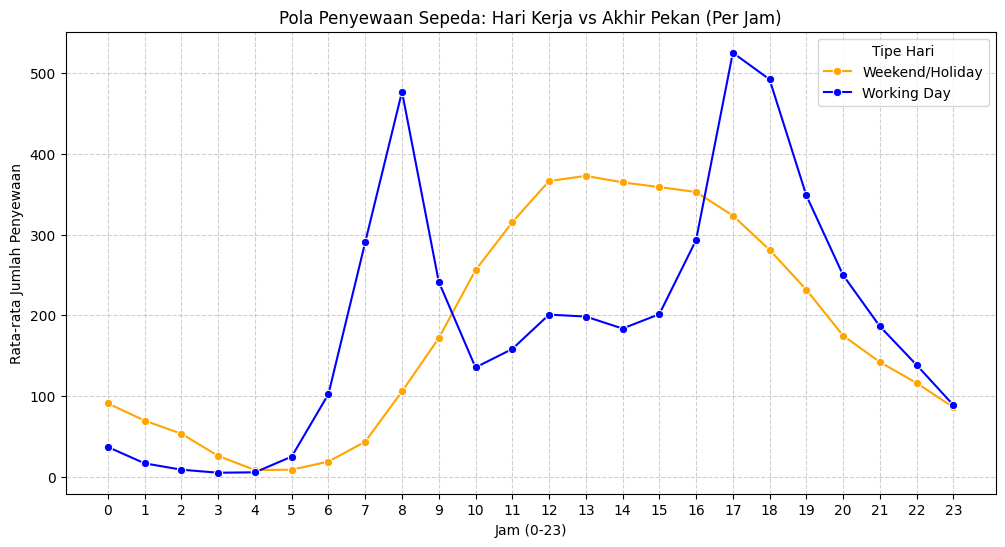

In [56]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_hour,
    x='hr',
    y='cnt',
    hue='workingday',
    palette={'Weekend/Holiday': 'orange', 'Working Day': 'blue'},
    marker='o',
    errorbar=None # Menghilangkan bayangan di sekitar garis agar lebih bersih
)

plt.title('Pola Penyewaan Sepeda: Hari Kerja vs Akhir Pekan (Per Jam)')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Tipe Hari')

plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca dan musim mempengaruhi jumlah total penyewaan sepeda harian?

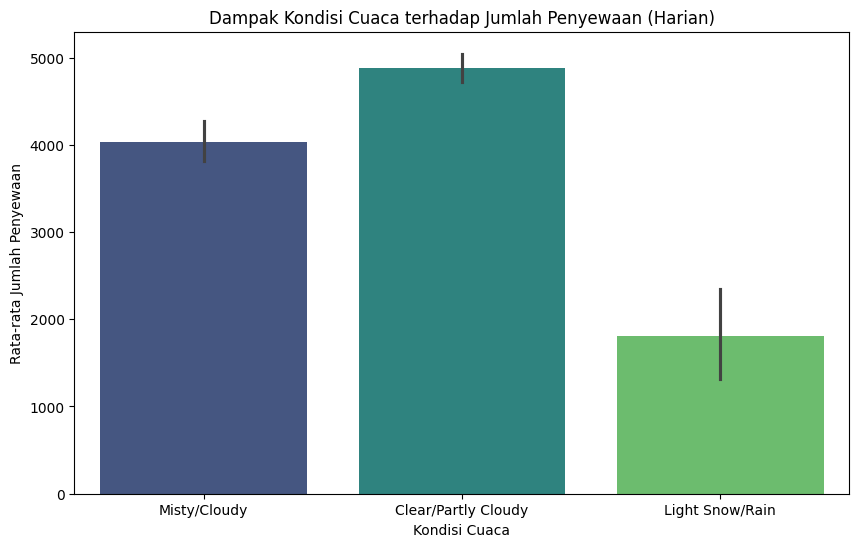

In [57]:
plt.figure(figsize=(10, 6))

# Membuat Bar Plot untuk pengaruh Cuaca
sns.barplot(
    data=df_day,
    x='weathersit',
    y='cnt',
    palette='viridis',
    hue='weathersit',
    legend=False
)

plt.title('Dampak Kondisi Cuaca terhadap Jumlah Penyewaan (Harian)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

/tmp/ipython-input-2829772299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


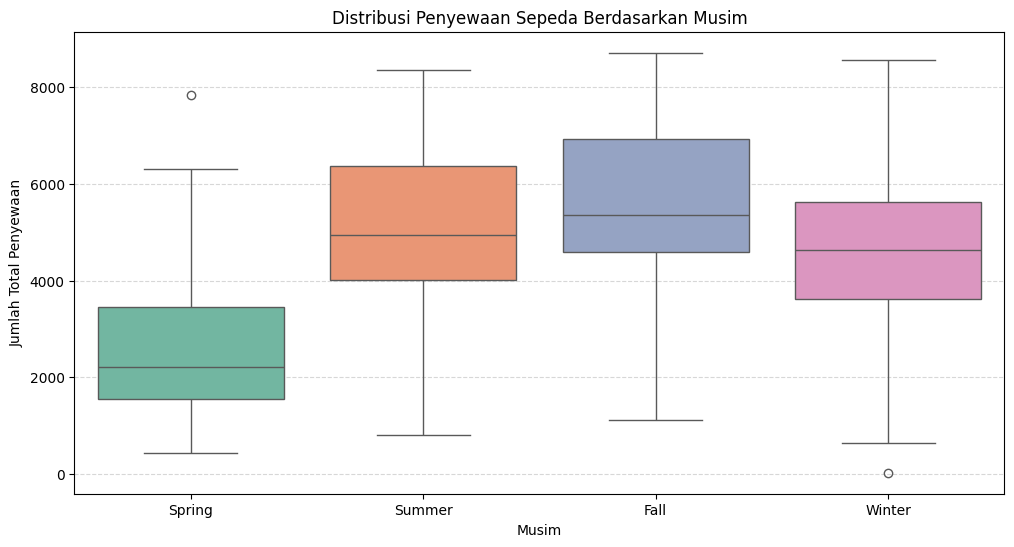

In [58]:
plt.figure(figsize=(12, 6))

# Membuat Boxplot untuk melihat sebaran penyewaan di setiap musim
sns.boxplot(
    data=df_day,
    x='season',
    y='cnt',
    palette='Set2'
)

plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**Insight:**
- Terjadi perbedaan perilaku yang sangat kontras antara hari kerja dan hari libur.
- Working Day (Garis Biru) menunjukkan pola Bimodal (dua puncak). Lonjakan tajam terjadi pada jam 08:00 dan 17:00-18:00. Ini mengonfirmasi bahwa penggunaan sepeda didominasi oleh aktivitas komuter (perjalanan kantor/sekolah).
- Weekend/Holiday (Garis Orange) menunjukkan pola Unimodal (satu puncak). Aktivitas meningkat secara bertahap mulai pagi hari dan mencapai puncaknya di siang hari (12:00-15:00), yang mencerminkan penggunaan untuk tujuan rekreasi dan waktu luang.
- Waktu paling sepi terjadi pada pukul 03:00-04:00, menjadikannya waktu ideal untuk pemeliharaan unit.
- Faktor lingkungan memiliki dampak langsung dan signifikan terhadap volume penyewaan.
- Musim Fall (Gugur) adalah periode dengan penyewaan tertinggi, disusul oleh Summer (Panas). Hal ini menunjukkan bahwa suhu yang hangat cenderung meningkatkan minat masyarakat untuk bersepeda.
- Terdapat korelasi negatif yang kuat antara intensitas cuaca ekstrem dengan jumlah penyewa. Kondisi Clear/Partly Cloudy mendominasi total pendapatan, sementara kondisi hujan/salju (kategori 3) menyebabkan penurunan drastis pada jumlah penyewaan harian.

## Analisis Lanjutan (Opsional)

## Conclusion

- Bagaimana pola penyewaan sepeda berbeda antara hari kerja (working day) dan hari libur (holiday/weekend)?

In [59]:
# Menggunakan pd.qcut untuk membagi data 'cnt' menjadi 3 bagian (kategori) yang sama besar

df_day['demand_cluster'] = pd.qcut(df_day['cnt'], q=3, labels=['Low Demand', 'Medium Demand', 'High Demand'])

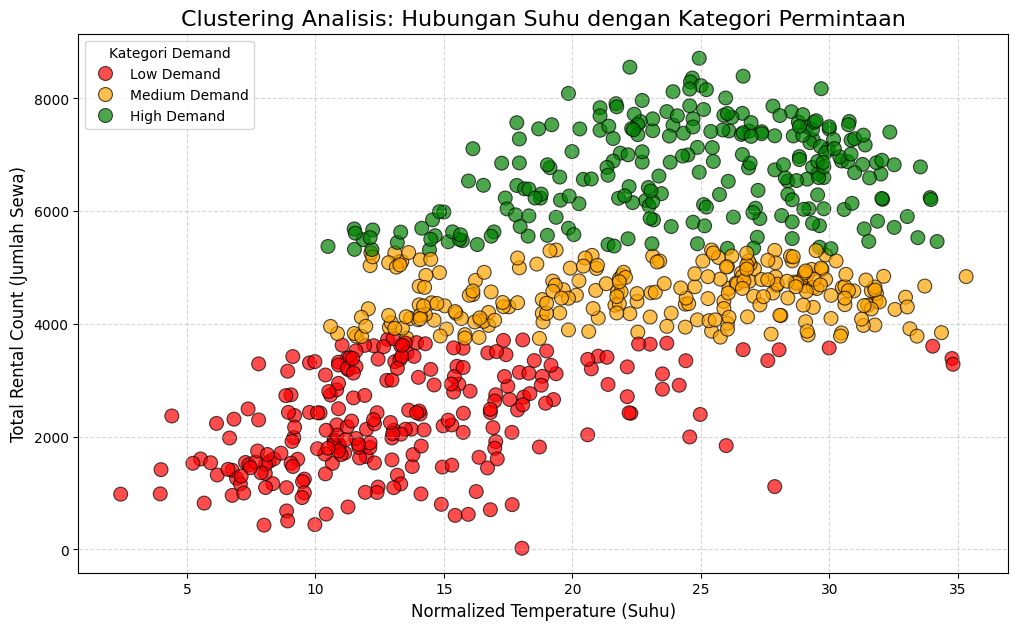

In [60]:
plt.figure(figsize=(12, 7))

# Scatter Plot: Temperature vs Count, diwarnai berdasarkan Cluster

sns.scatterplot(
    data=df_day,
    x='temp',
    y='cnt',
    hue='demand_cluster',
    palette={'Low Demand': 'red', 'Medium Demand': 'orange', 'High Demand': 'green'},
    s=100,
    alpha=0.7,
    edgecolor='black'
)

plt.title('Clustering Analisis: Hubungan Suhu dengan Kategori Permintaan', fontsize=16)
plt.xlabel('Normalized Temperature (Suhu)', fontsize=12)
plt.ylabel('Total Rental Count (Jumlah Sewa)', fontsize=12)
plt.legend(title='Kategori Demand')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

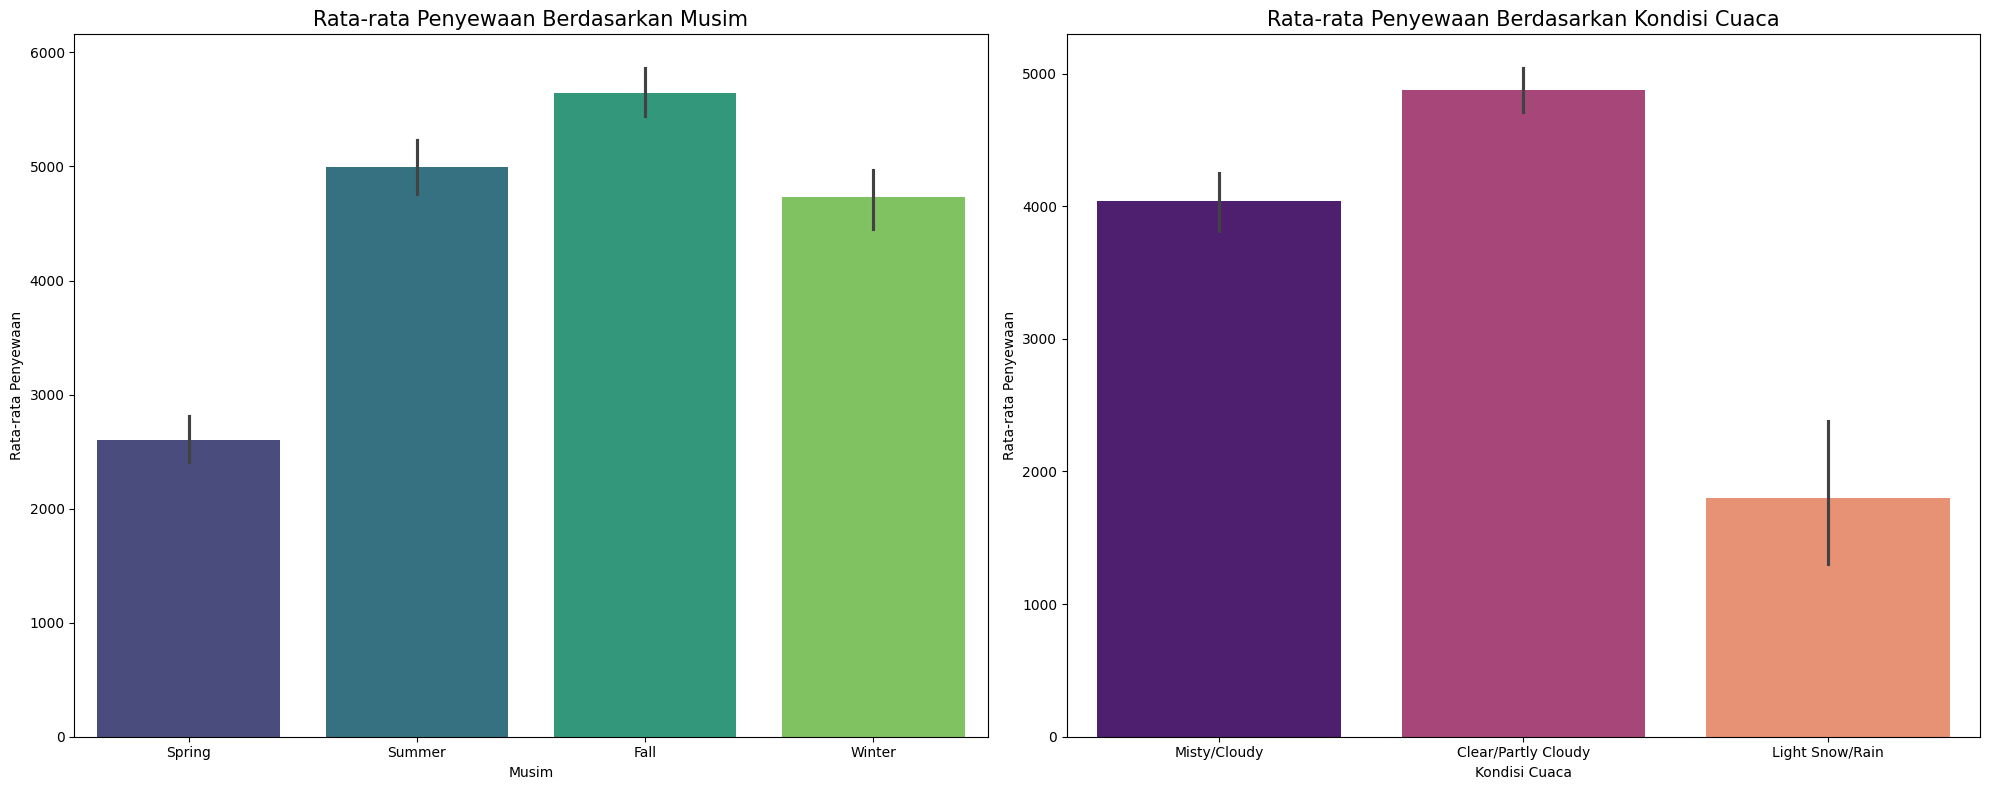

In [61]:
# Menyiapkan canvas dengan 2 subplots (1 baris, 2 kolom)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# 1. Visualisasi Berdasarkan Musim (Season)
sns.barplot(
    data=df_day,
    x='season',
    y='cnt',
    palette='viridis',
    hue='season',
    legend=False,
    ax=ax[0]
)
ax[0].set_title('Rata-rata Penyewaan Berdasarkan Musim', fontsize=15)
ax[0].set_xlabel('Musim')
ax[0].set_ylabel('Rata-rata Penyewaan')

# 2. Visualisasi Berdasarkan Kondisi Cuaca (Weather Situation)
sns.barplot(
    data=df_day,
    x='weathersit',
    y='cnt',
    palette='magma',
    hue='weathersit',
    legend=False,
    ax=ax[1]
)
ax[1].set_title('Rata-rata Penyewaan Berdasarkan Kondisi Cuaca', fontsize=15)
ax[1].set_xlabel('Kondisi Cuaca')
ax[1].set_ylabel('Rata-rata Penyewaan')

plt.tight_layout()
plt.show()

In [64]:
all_df = pd.merge(
    left=df_hour,
    right=df_day,
    how="left",
    on="dteday",
    suffixes=('_hour', '_day') # Memberi tanda jika ada kolom yang namanya sama
)

In [68]:
all_df['demand_cluster'] = pd.qcut(all_df['cnt_day'], q=3, labels=['Low Demand', 'Medium Demand', 'High Demand'])

In [70]:
all_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,demand_cluster
0,1,2011-01-01,Spring,0,January,0,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,...,Weekend/Holiday,Misty/Cloudy,14.11,18.18,80.58,10.75,331,654,985,Low Demand
1,2,2011-01-01,Spring,0,January,1,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,...,Weekend/Holiday,Misty/Cloudy,14.11,18.18,80.58,10.75,331,654,985,Low Demand
2,3,2011-01-01,Spring,0,January,2,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,...,Weekend/Holiday,Misty/Cloudy,14.11,18.18,80.58,10.75,331,654,985,Low Demand
3,4,2011-01-01,Spring,0,January,3,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,...,Weekend/Holiday,Misty/Cloudy,14.11,18.18,80.58,10.75,331,654,985,Low Demand
4,5,2011-01-01,Spring,0,January,4,No,Saturday,Weekend/Holiday,Clear/Partly Cloudy,...,Weekend/Holiday,Misty/Cloudy,14.11,18.18,80.58,10.75,331,654,985,Low Demand


In [69]:
all_df.to_csv("main_data.csv", index=False)